1.  hcpcs (Healthcare Common Procedure Coding System)
It contains codes used to describe medical procedures, services, and equipment. These codes are primarily used for billing purposes in the U.S. healthcare system.
Relevant Information:
hcpcs_code  representing a particular medical services and procedures for insurance claims, payments, and reimbursements.

 
 
2. icd_10_diagnoses_2019 (ICD-10-CM Diagnoses)
This table classify and describe medical diagnoses. 
These unique ICD-10 diagnosis code are used for clinical documentation and to bill for diagnosis-related healthcare services. They are vital for tracking and analyzing patient conditions.


3. icd_10_procedures_2019 (ICD-10-PCS Procedures)
This table includes ICD-10-PCS (Procedure Coding System) codes, which describe medical procedures performed on patients. The "2019" indicates that it is specific to codes in use during 2019.
These unique ICD-10 procedure code are used for billing, documentation, and analysis of procedures performed during patient care, particularly in inpatient settings.


4. icd_9_diagnoses (ICD-9-CM Diagnoses)
This table holds ICD-9-CM codes, which classify and describe medical diagnoses. ICD-9 was replaced by ICD-10 in October 2015, but these codes may still be relevant for historical data analysis.
The unique ICD-9 diagnosis code are primarily used for analyzing historical healthcare data and transitioning data between ICD-9 and ICD-10 systems.


5. icd_9_procedures (ICD-9-CM Procedures)
This table contains ICD-9-CM codes for medical procedures. Like ICD-9 diagnoses, these codes were used before transitioning to ICD-10.
The unique ICD-9 procedure code is useful for historical analysis and comparisons between ICD-9 and ICD-10 procedure data.

In [6]:
pip install google-cloud-bigquery pandas db-dtypes plotly


In [7]:
# Import the required libraries for BigQuery
from google.cloud import bigquery
import os
import pandas as pd
from plotly.offline import init_notebook_mode
import warnings

# Set the path to your Google Cloud credentials JSON
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'C:/Users/farou/OneDrive/Documents/cms-medicare2.json'

# Initialize Plotly to work in offline mode in the notebook
init_notebook_mode(connected=True)

# Handle warnings to keep output clean
warnings.filterwarnings("ignore")

# Install db-dtypes for better BigQuery compatibility
!pip install db-dtypes
import db_dtypes

# Initialize the BigQuery client
client = bigquery.Client()

# Define a function to execute queries and return dataframes
def run_query(query):
    query_job = client.query(query)  # Make an API request with the query
    result = query_job.to_dataframe()  # Convert the results to a pandas DataFrame
    return result

# Example query to get data from the 'hcpcs' table in the 'cms_codes' dataset
query = """
SELECT * FROM `bigquery-public-data.cms_codes.hcpcs` LIMIT 10
"""
df = run_query(query)

# Display the result as a DataFrame
print(df)


    HCPC SEQNUM  RECID                                   LONG_DESCRIPTION  \
0     ZB   0010      7                                     Pfizer/hospira   
1     Q2   0010      7                    Demonstration procedure/service   
2     PO   0010      7  Excepted service provided at an off-campus, ou...   
3     V2   0010      7                           Demonstration modifier 2   
4     PN   0010      7  Non-excepted service provided at an off-campus...   
5     V1   0010      7                           Demonstration modifier 1   
6     V3   0010      7                           Demonstration modifier 3   
7     FX   0010      7                             X-ray taken using film   
8     L1   0010      7  Provider attestation that the hospital laborat...   
9  G0154   0010      3  Direct skilled nursing services of a licensed ...   

             SHORT_DESCRIPTION PRICE1 PRICE2 PRICE3 PRICE4 MULT_PI  ... TOS1  \
0               Pfizer/hospira                                      ... 

### Understanding Data Structure

In [9]:
# Display the first few rows of the dataset to understand its structure
print(df.head())

# Get information about data types and missing values
print(df.info())

# Display summary statistics for numerical columns (if any)
print(df.describe())


  HCPC SEQNUM  RECID                                   LONG_DESCRIPTION  \
0   ZB   0010      7                                     Pfizer/hospira   
1   Q2   0010      7                    Demonstration procedure/service   
2   PO   0010      7  Excepted service provided at an off-campus, ou...   
3   V2   0010      7                           Demonstration modifier 2   
4   PN   0010      7  Non-excepted service provided at an off-campus...   

             SHORT_DESCRIPTION PRICE1 PRICE2 PRICE3 PRICE4 MULT_PI  ... TOS1  \
0               Pfizer/hospira                                      ...        
1      Demo procedure, service                                      ...        
2  Excepted off-campus service                                      ...        
3     Demonstration modifier 2                                      ...        
4  Non-excepted off-campus svc                                      ...        

  TOS2 TOS3  TOS4  TOS5 ANEST_BU    ADD_DT ACT_EFF_DT TERM_DT ACTION

### Data Cleaning

In [8]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

# Remove duplicate rows
df = df.drop_duplicates()


Number of duplicate rows: 0


In [15]:
# Display columns with missing values
print(df.isnull().sum())

# Remove rows where 'LONG_DESCRIPTION' is missing (if it's critical)
df = df.dropna(subset=['LONG_DESCRIPTION'])

# Fill missing values in 'TERM_DT' with 'Active' to indicate ongoing codes
df['TERM_DT'] = df['TERM_DT'].fillna('Active')
df.head(3)

HCPC                  0
SEQNUM                0
RECID                 0
LONG_DESCRIPTION      0
SHORT_DESCRIPTION     0
PRICE1                0
PRICE2                0
PRICE3                0
PRICE4                0
MULT_PI               0
CIM1                  0
CIM2                  0
CIM3                  0
MCM1                  0
MCM2                 10
MCM3                  0
STATUTE               0
LABCERT1              0
LABCERT2              0
LABCERT3              0
LABCERT4              0
LABCERT5              0
LABCERT6              0
LABCERT7              0
LABCERT8              0
XREF1                 0
XREF2                 0
XREF3                 0
XREF4                 0
XREF5                 0
COV                   0
ASC_GRP               0
ASC_DT                0
OPPS                  0
OPPS_PI               0
OPPS_DT               0
PROCNOTE              0
BETOS                 0
TOS1                  0
TOS2                  0
TOS3                  0
TOS4            

,HCPC,SEQNUM,RECID,LONG_DESCRIPTION,SHORT_DESCRIPTION,PRICE1,PRICE2,PRICE3,PRICE4,MULT_PI,...,TOS1,TOS2,TOS3,TOS4,TOS5,ANEST_BU,ADD_DT,ACT_EFF_DT,TERM_DT,ACTION_CD
0,ZB,0010,7,Pfizer/hospira,Pfizer/hospira,,,,,,...,,,,,,,20160701,20160701,,<NA>
1,Q2,0010,7,Demonstration procedure/service,"Demo procedure, service",,,,,,...,,,,,,,19920101,20170101,,<NA>
2,PO,0010,7,"Excepted service provided at an off-campus, ou...",Excepted off-campus service,,,,,,...,,,,,,,20150101,20170101,,<NA>


In [17]:
# Standardize the format of 'HCPC' to uppercase (if needed)
df['HCPC'] = df['HCPC'].str.upper()


### Data Exploration

In [19]:
# Get the frequency of each HCPCS code
hcpcs_freq = df['HCPC'].value_counts().head(10)
print("Top 10 Most Common HCPCS Codes:")
print(hcpcs_freq)


Top 10 Most Common HCPCS Codes:
HCPC
ZB       1
Q2       1
PO       1
V2       1
PN       1
V1       1
V3       1
FX       1
L1       1
G0154    1
Name: count, dtype: int64


In [20]:
# Get the most frequent descriptions
description_freq = df['LONG_DESCRIPTION'].value_counts().head(10)
print("Top 10 Most Common Descriptions:")
print(description_freq)


Top 10 Most Common Descriptions:
LONG_DESCRIPTION
Pfizer/hospira                                                                                                            1
Demonstration procedure/service                                                                                           1
Excepted service provided at an off-campus, outpatient, provider-based department of a hospital                           1
Demonstration modifier 2                                                                                                  1
Non-excepted service provided at an off-campus, outpatient, provider-based department of a hospital                       1
Demonstration modifier 1                                                                                                  1
Demonstration modifier 3                                                                                                  1
X-ray taken using film                                                            

In [22]:
# Convert date columns to datetime format for analysis
df['ACT_EFF_DT'] = pd.to_datetime(df['ACT_EFF_DT'], errors='coerce')
df['TERM_DT'] = pd.to_datetime(df['TERM_DT'], errors='coerce')

# Analyze the number of codes introduced each year
df['effective_year'] = df['ACT_EFF_DT'].dt.year
effective_year_counts = df['effective_year'].value_counts().sort_index()

print("Number of HCPCS Codes Introduced Each Year:")
print(effective_year_counts)


Number of HCPCS Codes Introduced Each Year:
effective_year
2016    2
2017    8
Name: count, dtype: int64


In [24]:
# Analyze active and terminated codes
df['status'] = df['TERM_DT'].apply(lambda x: 'Active' if pd.isnull(x) else 'Terminated')
status_counts = df['status'].value_counts()

print("Number of Active vs. Terminated HCPCS Codes:")
print(status_counts)


Number of Active vs. Terminated HCPCS Codes:
status
Active        8
Terminated    2
Name: count, dtype: int64


In [26]:
# Calculate the duration each code was active (if terminated)
df['active_duration_days'] = (df['TERM_DT'] - df['ACT_EFF_DT']).dt.days

# Filter for terminated codes
terminated_codes = df[df['status'] == 'Terminated']

# Calculate the average active duration for terminated codes
avg_active_duration = terminated_codes['active_duration_days'].mean()

print(f"Average active duration for terminated codes: {avg_active_duration} days")


Average active duration for terminated codes: -1.0 days


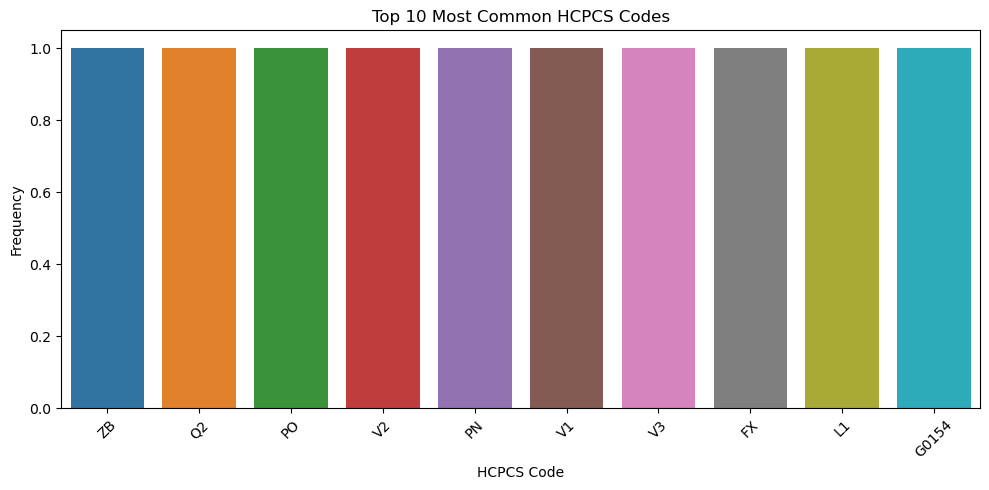

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for the top 10 most common HCPCS codes
plt.figure(figsize=(10, 5))
sns.barplot(x=hcpcs_freq.index, y=hcpcs_freq.values)
plt.title('Top 10 Most Common HCPCS Codes')
plt.xlabel('HCPCS Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


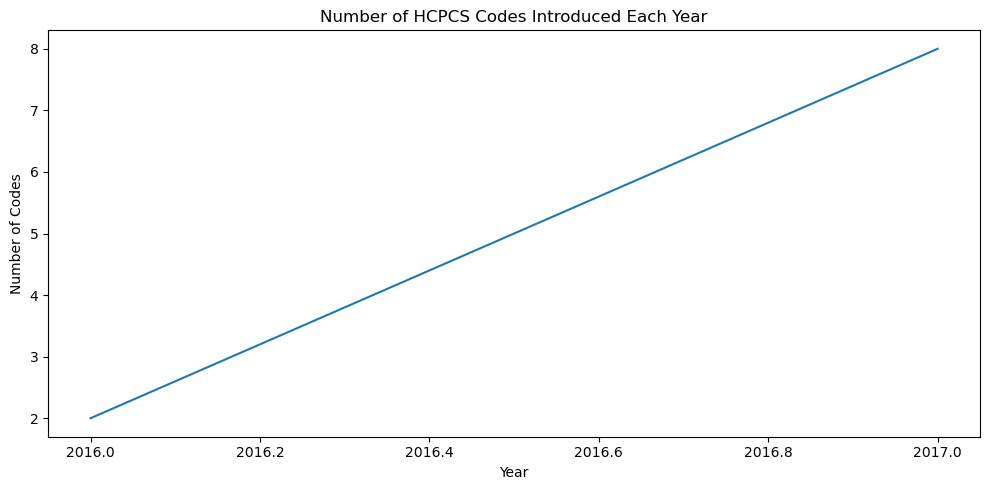

In [28]:
# Line chart for the number of codes introduced each year
plt.figure(figsize=(10, 5))
sns.lineplot(x=effective_year_counts.index, y=effective_year_counts.values)
plt.title('Number of HCPCS Codes Introduced Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Codes')
plt.tight_layout()
plt.show()


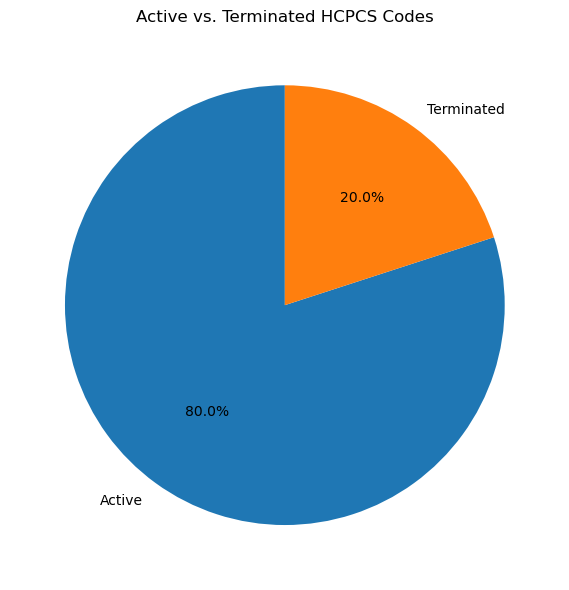

In [30]:
# Pie chart for active vs. terminated codes
plt.figure(figsize=(6, 6))
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Active vs. Terminated HCPCS Codes')
plt.ylabel('')
plt.tight_layout()
plt.show()


# icd_10_diagnoses_2019

In [35]:
# SQL query to retrieve the first 10 rows of the ICD-10 diagnoses data for 2019
query1 = """
SELECT * FROM `bigquery-public-data.cms_codes.icd10_diagnoses_2019` LIMIT 10;
"""

# Execute the query using the BigQuery client
query_job = client.query(query1)  # Make an API request to execute the query

# Convert the query result into a pandas DataFrame
response1 = query_job.to_dataframe()

# Display the top 10 rows of the DataFrame
print(response1.head(10))

  order_number  cm_code  is_header_code  \
0        00004     A009           False   
1        01543    C4339           False   
2        03541     D696           False   
3        03955  E093593           False   
4        05041   F12129           False   
5        06022   G40309           False   
6        14436     L491           False   
7        15632   M05621           False   
8        20208   M71332           False   
9        21445  M84522K           False   

                                   short_description  \
0                               Cholera, unspecified   
1          Malignant melanoma of other parts of face   
2                      Thrombocytopenia, unspecified   
3  Drug/chem diab with prolif diab rtnop without ...   
4      Cannabis abuse with intoxication, unspecified   
5  Gen idiopathic epilepsy, not intractable, w/o ...   
6  Exfoliatn due to erythemat cond w 10-19 pct of...   
7  Rheu arthritis of r elbow w involv of organs a...   
8                     

In [37]:
# Define the SQL query to retrieve column names and data types from the 'icd10_diagnoses_2019' table
query = """
SELECT column_name, data_type
FROM `bigquery-public-data.cms_codes.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'icd10_diagnoses_2019';
"""

# Execute the query and store the results in a pandas DataFrame
query_job = client.query(query)
columns_info = query_job.to_dataframe()

# Display the DataFrame to see the structure of the table
print(columns_info)



         column_name data_type
0       order_number    STRING
1            cm_code    STRING
2     is_header_code      BOOL
3  short_description    STRING
4   long_description    STRING


In [43]:
# Define the updated SQL query with correct column names
query = """
SELECT 
    COUNT(*) AS total_rows,
    COUNT(cm_code) AS non_null_icd_codes,
    COUNT(long_description) AS non_null_descriptions
FROM `bigquery-public-data.cms_codes.icd10_diagnoses_2019`;
"""

# Execute the query and convert the results to a pandas DataFrame
query_job = client.query(query)
result_df = query_job.to_dataframe()

# Display the result
print(result_df)


   total_rows  non_null_icd_codes  non_null_descriptions
0       94444               94444                  94444


In [45]:
# Define the updated SQL query with correct column names
query = """
SELECT cm_code, COUNT(*) AS occurrences
FROM `bigquery-public-data.cms_codes.icd10_diagnoses_2019`
GROUP BY cm_code
HAVING occurrences > 1;
"""

# Execute the query and convert the results to a pandas DataFrame
query_job = client.query(query)
result_df = query_job.to_dataframe()

# Display the result
print(result_df)

Empty DataFrame
Columns: [cm_code, occurrences]
Index: []


In [52]:
query = """
SELECT cm_code, long_description, COUNT(*) AS occurrences
FROM `bigquery-public-data.cms_codes.icd10_diagnoses_2019`
GROUP BY cm_code, long_description
ORDER BY occurrences DESC
LIMIT 10;
"""

# Execute the query and convert the results to a pandas DataFrame
query_job = client.query(query)
result_df = query_job.to_dataframe()

# Display the result
print(result_df)

   cm_code                                   long_description  occurrences
0   G40309  Generalized idiopathic epilepsy and epileptic ...            1
1   M71332                      Other bursal cyst, left wrist            1
2  M84522K  Pathological fracture in neoplastic disease, l...            1
3   M05621  Rheumatoid arthritis of right elbow with invol...            1
4    C4339          Malignant melanoma of other parts of face            1
5     A009                               Cholera, unspecified            1
6  E093593  Drug or chemical induced diabetes mellitus wit...            1
7     L491  Exfoliation due to erythematous condition invo...            1
8   F12129      Cannabis abuse with intoxication, unspecified            1
9     D696                      Thrombocytopenia, unspecified            1


In [51]:
# Define the SQL query to group by 'is_header_code' and count the number of codes
query = """
SELECT is_header_code, COUNT(*) AS num_codes
FROM `bigquery-public-data.cms_codes.icd10_diagnoses_2019`
GROUP BY is_header_code
ORDER BY num_codes DESC;
"""

# Execute the query and convert the results to a pandas DataFrame
query_job = client.query(query)
detailed_codes_df = query_job.to_dataframe()

# Display the result
print(detailed_codes_df)


   is_header_code  num_codes
0           False      71932
1            True      22512


In [54]:
# Define the SQL query to find occurrences of codes related to diabetes or hypertension
query = """
SELECT cm_code, long_description, COUNT(*) AS occurrences
FROM `bigquery-public-data.cms_codes.icd10_diagnoses_2019`
WHERE long_description LIKE '%diabetes%' OR long_description LIKE '%hypertension%'
GROUP BY cm_code, long_description
ORDER BY occurrences DESC;
"""

# Execute the query and convert the results to a pandas DataFrame
query_job = client.query(query)
detailed_codes_df = query_job.to_dataframe()

# Display the result
print(detailed_codes_df)



     cm_code                                   long_description  occurrences
0    E093593  Drug or chemical induced diabetes mellitus wit...            1
1    E103412  Type 1 diabetes mellitus with severe nonprolif...            1
2    E113542  Type 2 diabetes mellitus with proliferative di...            1
3     O24425  Gestational diabetes mellitus in childbirth, c...            1
4     O10011  Pre-existing essential hypertension complicati...            1
..       ...                                                ...          ...
616     E114  Type 2 diabetes mellitus with neurological com...            1
617   E13349  Other specified diabetes mellitus with severe ...            1
618   E11349  Type 2 diabetes mellitus with severe nonprolif...            1
619     E104  Type 1 diabetes mellitus with neurological com...            1
620   E10339  Type 1 diabetes mellitus with moderate nonprol...            1

[621 rows x 3 columns]


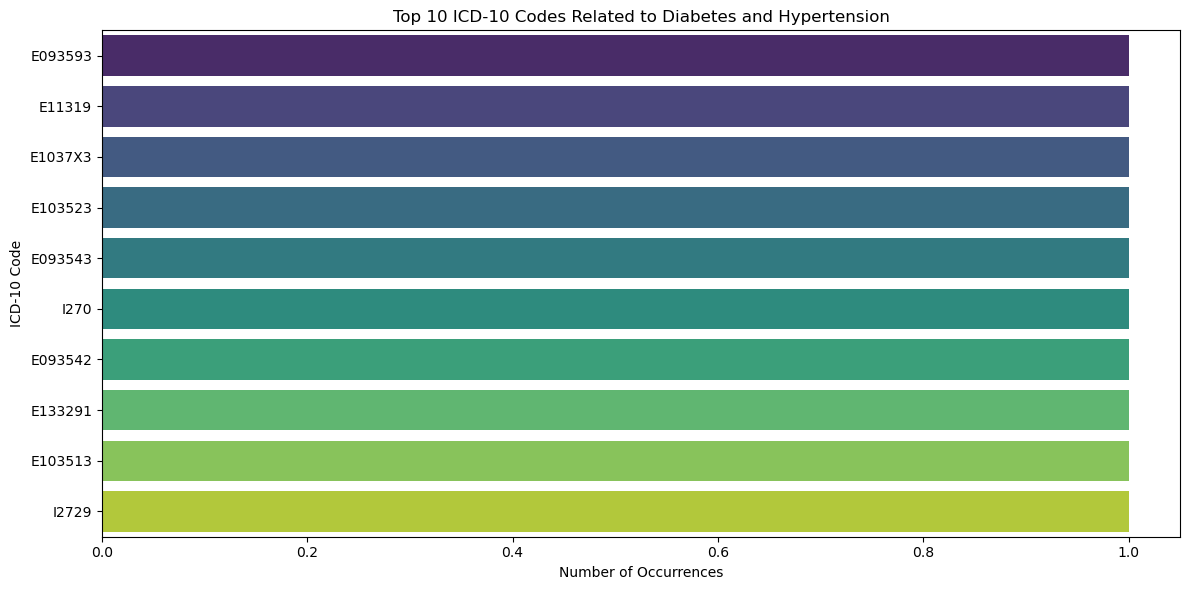

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the data by 'occurrences' in descending order for better visualization
detailed_codes_df = detailed_codes_df.sort_values(by='occurrences', ascending=False)

# Create a bar chart for the top 10 most common codes related to diabetes and hypertension
plt.figure(figsize=(12, 6))
sns.barplot(
    x='occurrences',
    y='cm_code',
    data=detailed_codes_df.head(10),
    palette='viridis'
)
plt.title('Top 10 ICD-10 Codes Related to Diabetes and Hypertension')
plt.xlabel('Number of Occurrences')
plt.ylabel('ICD-10 Code')
plt.tight_layout()
plt.show()


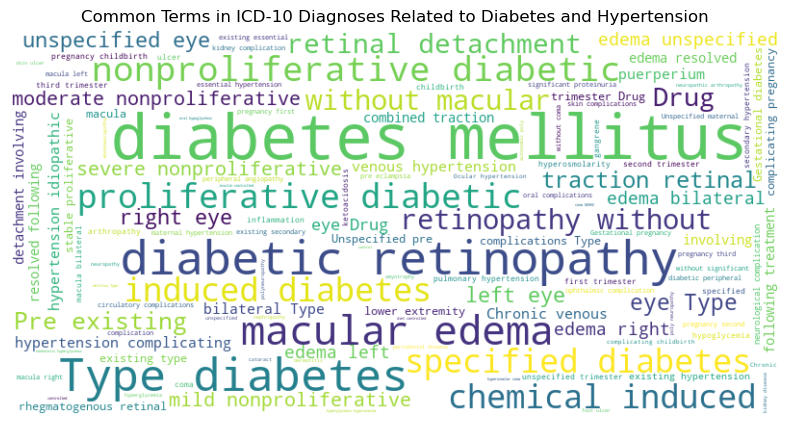

In [56]:
from wordcloud import WordCloud

# Combine all long descriptions into a single string
text = ' '.join(detailed_codes_df['long_description'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title('Common Terms in ICD-10 Diagnoses Related to Diabetes and Hypertension')
plt.show()


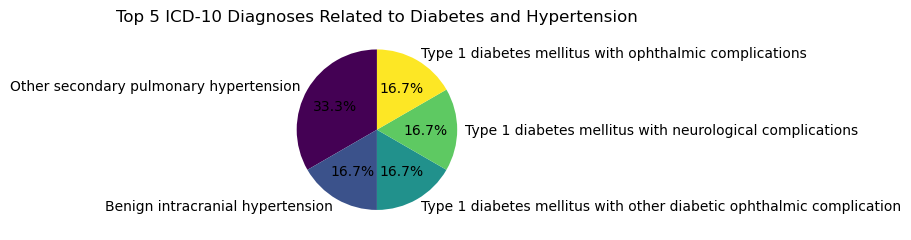

In [58]:
# Group data by 'long_description' and sum occurrences
description_distribution = detailed_codes_df.groupby('long_description')['occurrences'].sum()

# Sort and select the top 5 descriptions for the pie chart
top_descriptions = description_distribution.sort_values(ascending=False).head(5)

# Create a pie chart
plt.figure(figsize=(8, 8))
top_descriptions.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Top 5 ICD-10 Diagnoses Related to Diabetes and Hypertension')
plt.ylabel('')  # Hide the y-label for clarity
plt.tight_layout()
plt.show()


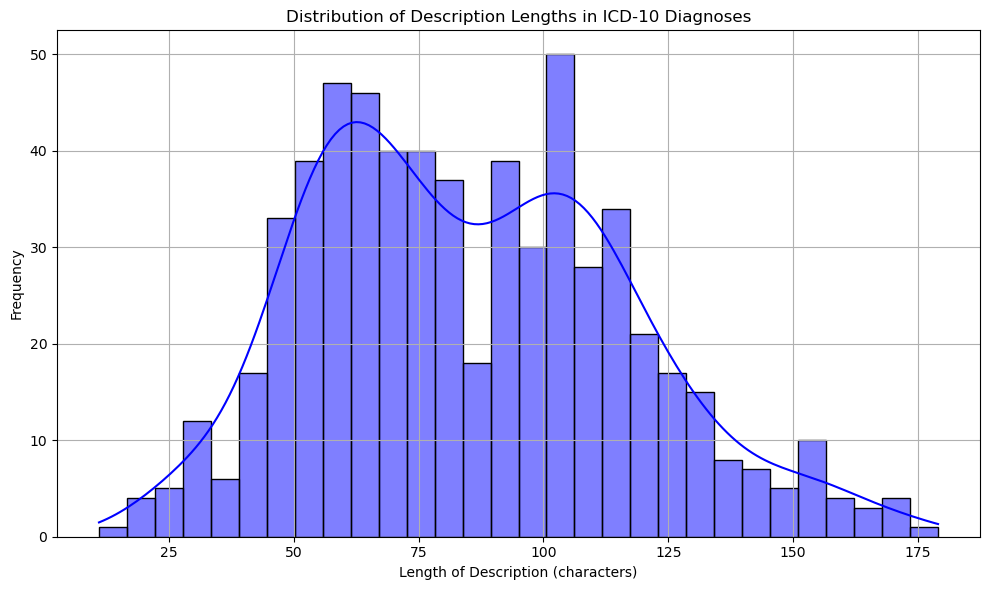

In [59]:
# Calculate the length of each long description
detailed_codes_df['description_length'] = detailed_codes_df['long_description'].str.len()

# Create a distribution plot for description lengths
plt.figure(figsize=(10, 6))
sns.histplot(detailed_codes_df['description_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Description Lengths in ICD-10 Diagnoses')
plt.xlabel('Length of Description (characters)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

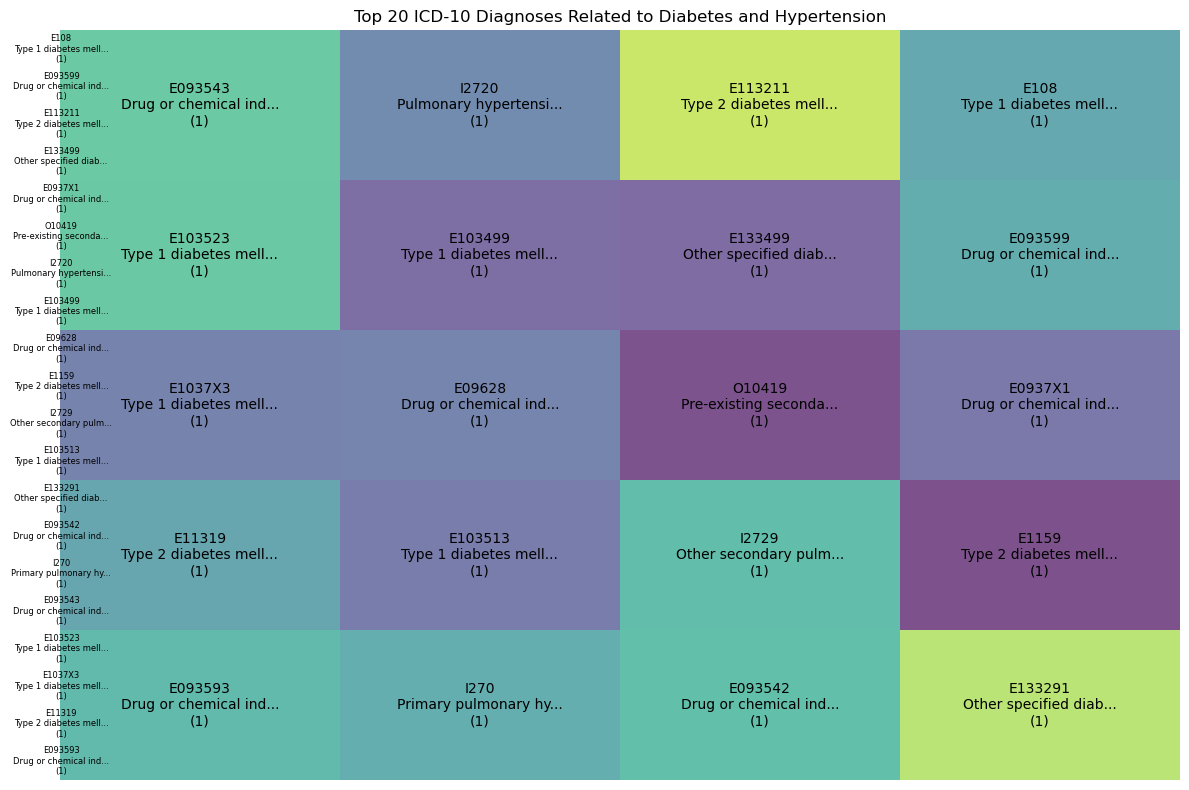

In [66]:
!pip install squarify

import squarify
import numpy as np

# Prepare data for the treemap (top 20 codes)
top_20_codes = detailed_codes_df.nlargest(20, 'occurrences')

# Prepare labels with a shorter description or just display the code
labels = [
    f"{code}\n{desc[:20]}...\n({occ})"
    for code, desc, occ in zip(
        top_20_codes['cm_code'],
        top_20_codes['long_description'],
        top_20_codes['occurrences']
    )
]

# Create the treemap with adjusted font size
plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=top_20_codes['occurrences'],
    label=labels,
    alpha=0.7
)

# Adjust font size based on the size of each rectangle
for i, rect in enumerate(squarify.squarify(top_20_codes['occurrences'], 0, 0, 100, 100)):
    font_size = np.clip(rect['dx'] / 10, 6, 14)  # Adjust font size based on rectangle width
    plt.text(
        rect['x'] + rect['dx'] / 2,
        rect['y'] + rect['dy'] / 2,
        labels[i],
        ha='center',
        va='center',
        fontsize=font_size
    )

plt.title('Top 20 ICD-10 Diagnoses Related to Diabetes and Hypertension')
plt.axis('off')
plt.tight_layout()
plt.show()



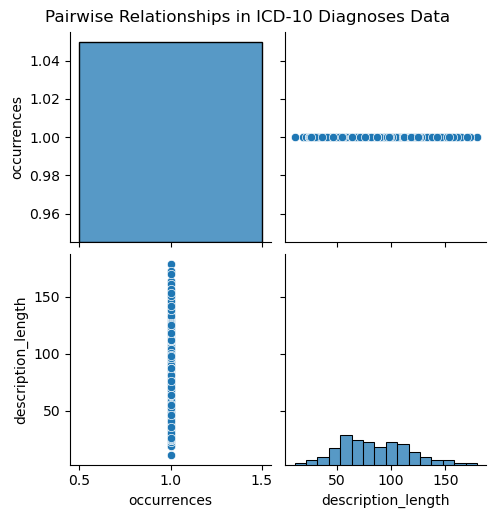

In [64]:
# Check if 'occurrences' and 'description_length' are present, and create them if necessary
if 'description_length' not in detailed_codes_df.columns:
    detailed_codes_df['description_length'] = detailed_codes_df['long_description'].str.len()

# Create a pairplot for numeric columns that are available
numeric_columns = detailed_codes_df[['occurrences', 'description_length']]

# Create a pairplot
sns.pairplot(numeric_columns)
plt.suptitle('Pairwise Relationships in ICD-10 Diagnoses Data', y=1.02)
plt.show()

# icd_10_procedures_2019

In [69]:
# SQL query to get the column names and their data types
query = """
SELECT column_name, data_type
FROM `bigquery-public-data.cms_codes.INFORMATION_SCHEMA.COLUMNS`
WHERE table_name = 'icd10_procedures_2019';
"""

# Execute the query and convert to a DataFrame
query_job = client.query(query)
columns_df = query_job.to_dataframe()
print(columns_df)


         column_name data_type
0       order_number    STRING
1           pcs_code    STRING
2     is_header_code      BOOL
3  short_description    STRING
4   long_description    STRING


In [85]:
# Retrieve the first few rows of the dataset 
query = """
SELECT * 
FROM `bigquery-public-data.cms_codes.icd10_procedures_2019`
LIMIT 10;
"""

query_job = client.query(query)
sample_data = query_job.to_dataframe()
print(sample_data.head())

  order_number pcs_code  is_header_code short_description long_description
0        67369      0XH            <NA>              None             None
1        67514      0XJ            <NA>              None             None
2        67579      0XM            <NA>              None             None
3        67608      0XP            <NA>              None             None
4        67665      0XQ            <NA>              None             None


In [87]:
# Group by 'icd_10_code' and 'long_description' to count occurrences
occurrences_df = sample_data.groupby(['pcs_code', 'long_description']).size().reset_index(name='occurrences')

# Display the first few rows to verify
print(occurrences_df.head())


Empty DataFrame
Columns: [pcs_code, long_description, occurrences]
Index: []


### Data Cleaning

In [72]:
# Identify the number of missing values in each column.
query = """
SELECT 
    COUNT(*) AS total_rows,
    COUNT(pcs_code) AS non_null_pcs_code,
    COUNT(long_description) AS non_null_long_descriptions
FROM `bigquery-public-data.cms_codes.icd10_procedures_2019`;
"""

query_job = client.query(query)
missing_values_df = query_job.to_dataframe()
print(missing_values_df)

   total_rows  non_null_icd_10_codes  non_null_long_descriptions
0       79758                  79758                       67290


In [74]:
# Find any duplicate ICD-10 procedure codes to ensure that each code is unique.
query = """
SELECT pcs_code, COUNT(*) AS occurrences
FROM `bigquery-public-data.cms_codes.icd10_procedures_2019`
GROUP BY pcs_code
HAVING occurrences > 1;
"""

query_job = client.query(query)
duplicates_df = query_job.to_dataframe()
print(duplicates_df)

    pcs_code  occurrences
0   2.70E+09            3
1   2.71E+09            3
2   2.72E+09            3
3   2.73E+09            3
4   3.70E+09            3
5   3.71E+09            3
6   3.72E+09            3
7   3.73E+09            3
8   3.74E+09            3
9   3.75E+09            3
10  3.76E+09            3
11  3.77E+09            3
12  3.78E+09            3
13  3.79E+09            3
14  4.70E+09            3
15  4.71E+09            3
16  4.72E+09            3
17  4.73E+09            3
18  4.74E+09            3
19  4.75E+09            3
20  4.76E+09            3
21  4.77E+09            3
22  4.78E+09            3
23  4.79E+09            3


In [75]:
# In practice, this step might be done in Python after loading the data into a DataFrame.
cleaned_data = sample_data.dropna(subset=['pcs_code', 'long_description'])


### Data Exploration

In [76]:
# Identify the most frequently occurring ICD-10 procedure codes
query = """
SELECT  pcs_code, long_description, COUNT(*) AS occurrences
FROM `bigquery-public-data.cms_codes.icd10_procedures_2019`
GROUP BY  pcs_code, long_description
ORDER BY occurrences DESC
LIMIT 10;
"""

query_job = client.query(query)
common_procedures_df = query_job.to_dataframe()
print(common_procedures_df)

  pcs_code long_description  occurrences
0      0XR             None            1
1      0XX             None            1
2      0XY             None            1
3      0XW             None            1
4      0XJ             None            1
5      0XH             None            1
6      0XP             None            1
7      0XU             None            1
8      0XQ             None            1
9      0XM             None            1


In [77]:
# Group procedures by a specific category
query = """
SELECT short_description, COUNT(*) AS num_procedures
FROM `bigquery-public-data.cms_codes.icd10_procedures_2019`
GROUP BY short_description
ORDER BY num_procedures DESC;
"""

query_job = client.query(query)
category_distribution_df = query_job.to_dataframe()
print(category_distribution_df)


                                       short_description  num_procedures
0                                                   None           12468
1      Bypass 1 Cor Art from Cor Art with Zooplastic,...               1
2      Bypass 1 Cor Art from R Int Mammary w Zooplast...               1
3      Bypass 1 Cor Art from L Int Mammary w Zooplast...               1
4      Bypass 1 Cor Art from Cor Art with Autol Vn, O...               1
...                                                  ...             ...
67286      Anatomical Regions, Upper Extremities, Change               1
67287     Anatomical Regions, Upper Extremities, Control               1
67288  Anatomical Regions, Upper Extremities, Detachment               1
67289    Anatomical Regions, Upper Extremities, Drainage               1
67290    Anatomical Regions, Upper Extremities, Excision               1

[67291 rows x 2 columns]


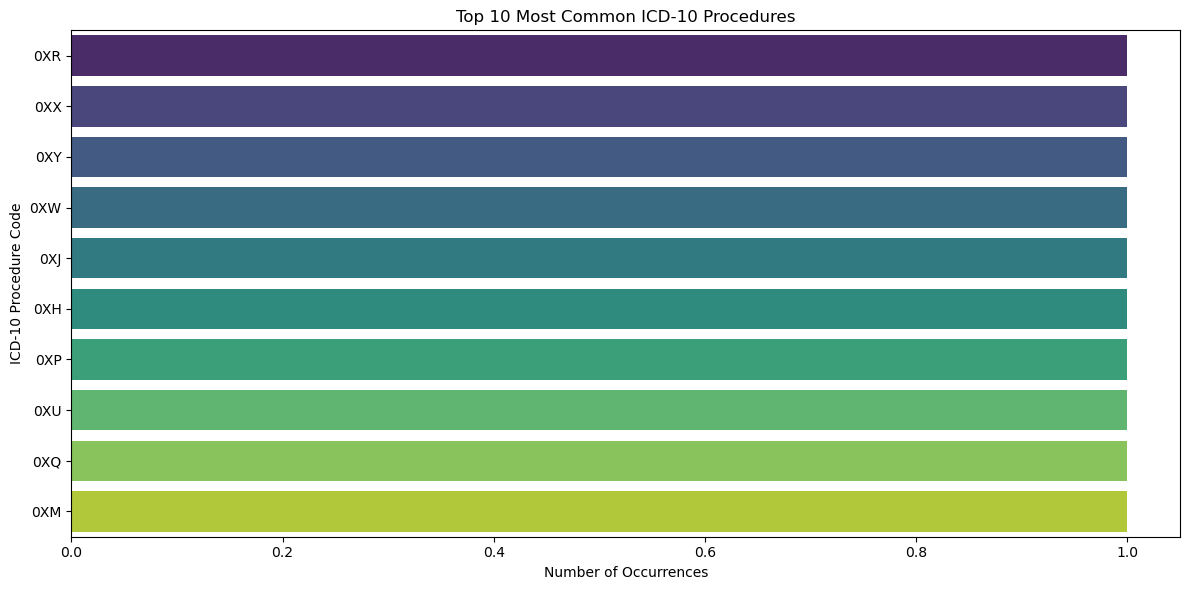

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart for the top 10 most common ICD-10 procedures
plt.figure(figsize=(12, 6))
sns.barplot(
    x='occurrences',
    y='pcs_code',
    data=common_procedures_df,
    palette='viridis'
)
plt.title('Top 10 Most Common ICD-10 Procedures')
plt.xlabel('Number of Occurrences')
plt.ylabel('ICD-10 Procedure Code')
plt.tight_layout()
plt.show()


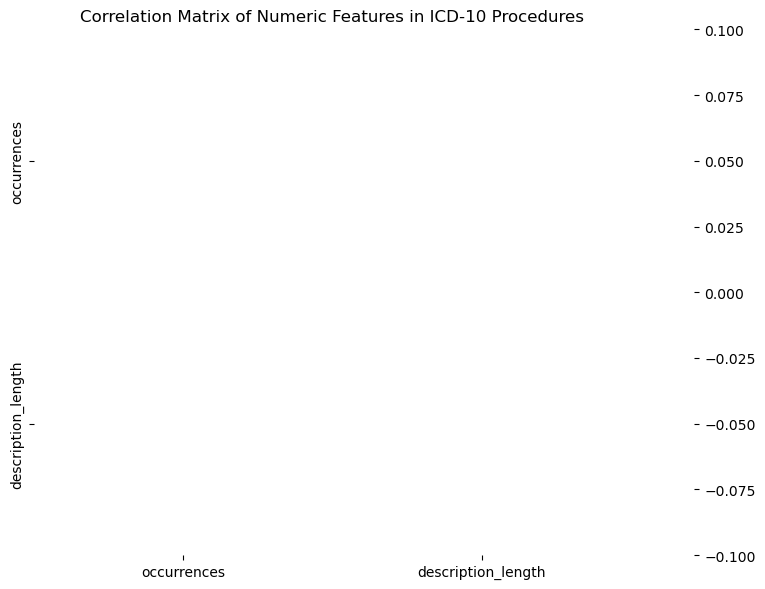

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a new column 'description_length' to measure the length of each description
occurrences_df['description_length'] = occurrences_df['long_description'].str.len()

# Select relevant numeric columns for correlation analysis
numeric_columns = occurrences_df[['occurrences', 'description_length']]

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features in ICD-10 Procedures')
plt.tight_layout()
plt.show()




In [93]:
import plotly.express as px

# Create an interactive bar chart for the top 10 ICD-10 codes
fig = px.bar(
   common_procedures_df,
    x='occurrences',
    y='pcs_code',
    orientation='h',
    hover_data=['long_description'],
    title='Top 10 Most Common ICD-10 Procedures',
    labels={'occurrences': 'Number of Occurrences', 'pcs_code': 'PCS Code'}
)

# Reverse the y-axis for better visualization (highest at the top)
fig.update_layout(yaxis={'categoryorder': 'total ascending'})

# Display the interactive chart
fig.show()


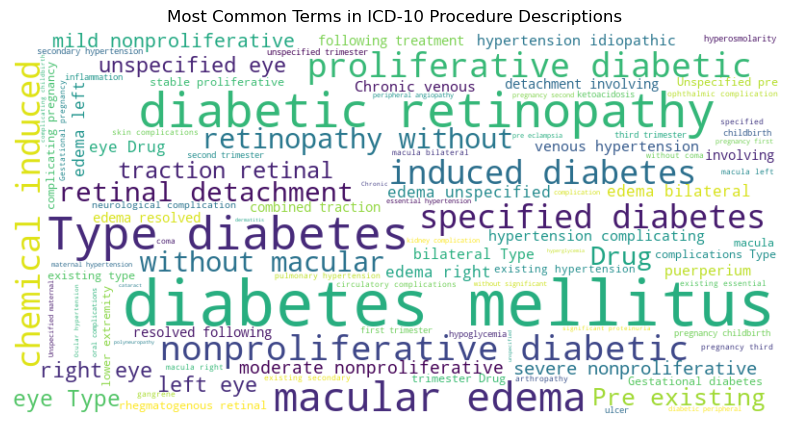

In [90]:
from wordcloud import WordCloud

# Combine all long descriptions into a single string
text = ' '.join(detailed_codes_df['long_description'].dropna())

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title('Most Common Terms in ICD-10 Procedure Descriptions')
plt.show()


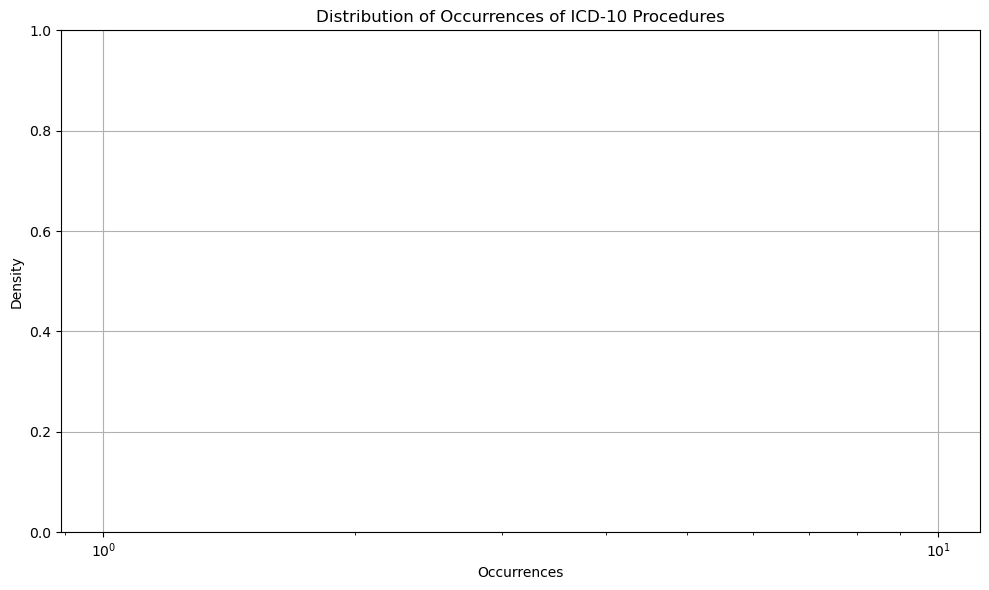

In [92]:
# Create a KDE plot for the 'occurrences' column
plt.figure(figsize=(10, 6))
sns.kdeplot(detailed_codes_df['occurrences'], shade=True, color='blue')
plt.title('Distribution of Occurrences of ICD-10 Procedures')
plt.xlabel('Occurrences')
plt.ylabel('Density')
plt.grid(True)
plt.xscale('log')  # Use log scale if the data is skewed
plt.tight_layout()
plt.show()


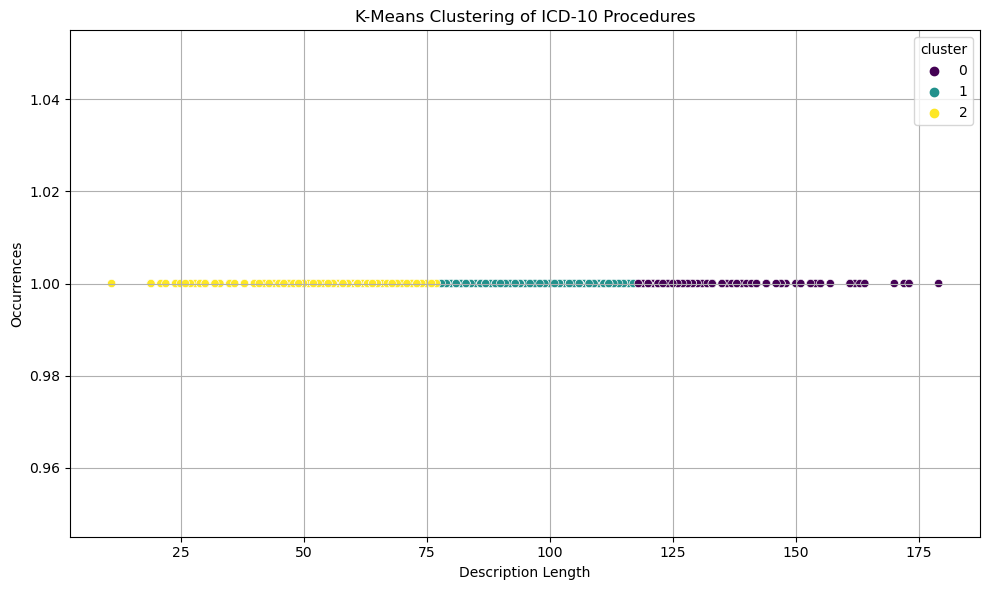

In [94]:
from sklearn.cluster import KMeans
import pandas as pd

# Feature engineering: Create a description length column
detailed_codes_df['description_length'] = detailed_codes_df['long_description'].str.len()

# Select features for clustering
features = detailed_codes_df[['occurrences', 'description_length']].dropna()

# Normalize features for better clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
detailed_codes_df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='description_length',
    y='occurrences',
    hue='cluster',
    data=detailed_codes_df,
    palette='viridis'
)
plt.title('K-Means Clustering of ICD-10 Procedures')
plt.xlabel('Description Length')
plt.ylabel('Occurrences')
plt.grid(True)
plt.tight_layout()
plt.show()
